# E signing of customers based on financial data

## Part 1: Data preprocessing

<b>Dataset link:</b> https://www.kaggle.com/aniruddhachoudhury/esigning-of-loan-based-on-financial-history?select=financial_data.csv

## Importing the libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Data exploration
<b>Load the data

In [2]:
dataset = pd.read_csv("financial_data.csv")

<b>Print first 5 rows from my dataset

In [3]:
dataset.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


<b>Print the last 5 rows from my dataset

In [4]:
dataset.tail()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
17903,9949728,31,monthly,0,3245,0,5,3,2,6,...,700,71700,0.691126,0.928196,0.664112,0.838012,0.727705,0.627705,2,0
17904,9442442,46,bi-weekly,0,6525,0,2,1,3,3,...,800,51800,0.648525,0.970832,0.699241,0.844724,0.774918,0.474918,3,0
17905,9857590,46,weekly,0,2685,0,5,1,1,8,...,1200,59650,0.677975,0.918141,0.687981,0.939101,0.472045,0.672045,9,0
17906,8708471,42,bi-weekly,0,2515,0,3,5,6,1,...,400,80200,0.642741,0.885684,0.456448,0.686823,0.406568,0.406568,3,1
17907,1498559,29,weekly,1,2665,0,4,10,4,1,...,600,64950,0.720889,0.874372,0.505565,0.631619,0.846163,0.846163,4,1


<b>Print the number of rows and columns

In [5]:
dataset.shape

(17908, 21)

<b>Print the information ( type of each column and the value of non-null of each one)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   entry_id              17908 non-null  int64  
 1   age                   17908 non-null  int64  
 2   pay_schedule          17908 non-null  object 
 3   home_owner            17908 non-null  int64  
 4   income                17908 non-null  int64  
 5   months_employed       17908 non-null  int64  
 6   years_employed        17908 non-null  int64  
 7   current_address_year  17908 non-null  int64  
 8   personal_account_m    17908 non-null  int64  
 9   personal_account_y    17908 non-null  int64  
 10  has_debt              17908 non-null  int64  
 11  amount_requested      17908 non-null  int64  
 12  risk_score            17908 non-null  int64  
 13  risk_score_2          17908 non-null  float64
 14  risk_score_3          17908 non-null  float64
 15  risk_score_4       

In [8]:
dataset.columns

Index(['entry_id', 'age', 'pay_schedule', 'home_owner', 'income',
       'months_employed', 'years_employed', 'current_address_year',
       'personal_account_m', 'personal_account_y', 'has_debt',
       'amount_requested', 'risk_score', 'risk_score_2', 'risk_score_3',
       'risk_score_4', 'risk_score_5', 'ext_quality_score',
       'ext_quality_score_2', 'inquiries_last_month', 'e_signed'],
      dtype='object')

In [9]:
dataset.select_dtypes(include='object').columns

Index(['pay_schedule'], dtype='object')

In [10]:
len(dataset.select_dtypes(include='object').columns)

1

In [11]:
dataset.select_dtypes(include=['int64','float64']).columns

Index(['entry_id', 'age', 'home_owner', 'income', 'months_employed',
       'years_employed', 'current_address_year', 'personal_account_m',
       'personal_account_y', 'has_debt', 'amount_requested', 'risk_score',
       'risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5',
       'ext_quality_score', 'ext_quality_score_2', 'inquiries_last_month',
       'e_signed'],
      dtype='object')

In [12]:
len(dataset.select_dtypes(include=['int64','float64']).columns)

20

<b>statistical summary of the data

In [13]:
# statistical summary
dataset.describe()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.790800e+04,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,5.596978e+06,43.015412,0.425173,3657.214653,1.186006,3.526860,3.584711,3.427183,3.503350,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226,0.538251
std,2.562473e+06,11.873107,0.494383,1504.890063,2.400897,2.259732,2.751937,2.216440,1.955568,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093,0.498549
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.378999e+06,34.000000,0.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622974,6.000000,1.000000
75%,7.805624e+06,51.000000,1.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.996260,0.970249,0.966953,30.000000,1.000000


## Dealing with the null values

In [14]:
#Check if there is any missing values
dataset.isnull().values.any()

False

In [15]:
dataset.isnull().values.sum()

0

In [16]:
dataset.isnull().sum()

entry_id                0
age                     0
pay_schedule            0
home_owner              0
income                  0
months_employed         0
years_employed          0
current_address_year    0
personal_account_m      0
personal_account_y      0
has_debt                0
amount_requested        0
risk_score              0
risk_score_2            0
risk_score_3            0
risk_score_4            0
risk_score_5            0
ext_quality_score       0
ext_quality_score_2     0
inquiries_last_month    0
e_signed                0
dtype: int64

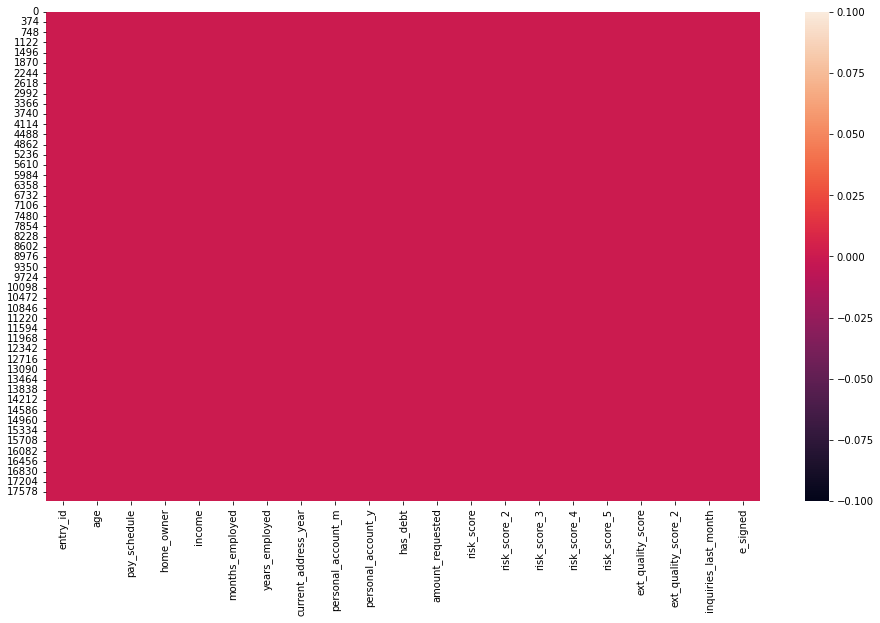

In [17]:
# null values with heatmap
plt.figure(figsize=(16,9))
sns.heatmap(dataset.isnull())
plt.show()

### Encoding the categorical data

In [18]:
dataset.select_dtypes(include='object').columns

Index(['pay_schedule'], dtype='object')

In [19]:
len(dataset.select_dtypes(include='object').columns)

1

In [20]:
dataset['pay_schedule'].unique()

array(['bi-weekly', 'weekly', 'semi-monthly', 'monthly'], dtype=object)

In [21]:
dataset['pay_schedule'].nunique()

4

In [22]:
dataset.shape

(17908, 21)

In [23]:
dataset = pd.get_dummies(data=dataset, drop_first=True)

In [24]:
dataset.head()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,...,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly
0,7629673,40,1,3135,0,3,3,6,2,1,...,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,0,0,0
1,3560428,61,0,3180,0,6,3,2,7,1,...,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,0,0,1
2,6934997,23,0,1540,6,0,0,7,1,1,...,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,0,0,1
3,5682812,40,0,5230,0,6,1,2,7,1,...,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,0,0,0
4,5335819,33,0,3590,0,5,2,2,8,1,...,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,0,1,0


In [25]:
dataset.shape

(17908, 23)

In [26]:
dataset = dataset.drop(columns=['entry_id'])

In [27]:
dataset.head() 

,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,...,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly
0,40,1,3135,0,3,3,6,2,1,550,...,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,0,0,0
1,61,0,3180,0,6,3,2,7,1,600,...,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,0,0,1
2,23,0,1540,6,0,0,7,1,1,450,...,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,0,0,1
3,40,0,5230,0,6,1,2,7,1,700,...,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,0,0,0
4,33,0,3590,0,5,2,2,8,1,1100,...,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,0,1,0


In [28]:
dataset.shape

(17908, 22)

In [29]:
len(dataset.select_dtypes(include='object').columns)

0

## Countplot

<AxesSubplot:xlabel='e_signed', ylabel='count'>

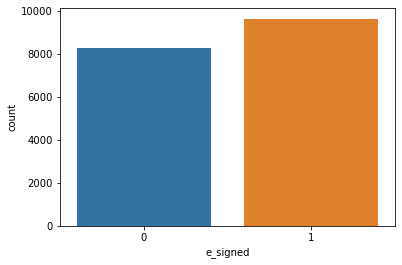

In [30]:
sns.countplot(dataset['e_signed'])

In [31]:
# e-signed values
(dataset.e_signed == 1).sum()

9639

In [32]:
# not e-signed values
(dataset.e_signed == 0).sum()

8269

### Restructure the dataset

In [33]:
dataset.head()

,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,...,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly
0,40,1,3135,0,3,3,6,2,1,550,...,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,0,0,0
1,61,0,3180,0,6,3,2,7,1,600,...,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,0,0,1
2,23,0,1540,6,0,0,7,1,1,450,...,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,0,0,1
3,40,0,5230,0,6,1,2,7,1,700,...,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,0,0,0
4,33,0,3590,0,5,2,2,8,1,1100,...,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,0,1,0


In [34]:
dataset['months employeed'] = (dataset.months_employed + dataset.years_employed *12)

In [35]:
dataset.head()

,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,...,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,months employeed
0,40,1,3135,0,3,3,6,2,1,550,...,0.487712,0.515977,0.580918,0.380918,10,1,0,0,0,36
1,61,0,3180,0,6,3,2,7,1,600,...,0.713423,0.826402,0.730720,0.630720,9,0,0,0,1,72
2,23,0,1540,6,0,0,7,1,1,450,...,0.595018,0.762284,0.531712,0.531712,7,0,0,0,1,6
3,40,0,5230,0,6,1,2,7,1,700,...,0.767828,0.778831,0.792552,0.592552,8,1,0,0,0,72
4,33,0,3590,0,5,2,2,8,1,1100,...,0.613487,0.665523,0.744634,0.744634,12,0,0,1,0,60


In [36]:
dataset = dataset.drop(columns=['months_employed', 'years_employed'])

In [37]:
dataset.head()

,age,home_owner,income,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,...,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,months employeed
0,40,1,3135,3,6,2,1,550,36200,0.737398,...,0.487712,0.515977,0.580918,0.380918,10,1,0,0,0,36
1,61,0,3180,3,2,7,1,600,30150,0.738510,...,0.713423,0.826402,0.730720,0.630720,9,0,0,0,1,72
2,23,0,1540,0,7,1,1,450,34550,0.642993,...,0.595018,0.762284,0.531712,0.531712,7,0,0,0,1,6
3,40,0,5230,1,2,7,1,700,42150,0.665224,...,0.767828,0.778831,0.792552,0.592552,8,1,0,0,0,72
4,33,0,3590,2,2,8,1,1100,53850,0.617361,...,0.613487,0.665523,0.744634,0.744634,12,0,0,1,0,60


In [38]:
dataset['personnal account months'] = (dataset.personal_account_m + dataset.personal_account_y *12)

In [39]:
dataset.head()

,age,home_owner,income,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,...,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,months employeed,personnal account months
0,40,1,3135,3,6,2,1,550,36200,0.737398,...,0.515977,0.580918,0.380918,10,1,0,0,0,36,30
1,61,0,3180,3,2,7,1,600,30150,0.738510,...,0.826402,0.730720,0.630720,9,0,0,0,1,72,86
2,23,0,1540,0,7,1,1,450,34550,0.642993,...,0.762284,0.531712,0.531712,7,0,0,0,1,6,19
3,40,0,5230,1,2,7,1,700,42150,0.665224,...,0.778831,0.792552,0.592552,8,1,0,0,0,72,86
4,33,0,3590,2,2,8,1,1100,53850,0.617361,...,0.665523,0.744634,0.744634,12,0,0,1,0,60,98


In [40]:
dataset = dataset.drop(columns=['personal_account_m', 'personal_account_y'])

In [41]:
dataset.head()

,age,home_owner,income,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,months employeed,personnal account months
0,40,1,3135,3,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,0,0,0,36,30
1,61,0,3180,3,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,0,0,1,72,86
2,23,0,1540,0,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,0,0,1,6,19
3,40,0,5230,1,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,0,0,0,72,86
4,33,0,3590,2,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,0,1,0,60,98


In [42]:
dataset.shape

(17908, 20)

## Correlation matrix and heatmap

In [44]:
dataset_2 = dataset.drop(columns=['e_signed'])

<AxesSubplot:title={'center':'Correlated with e_signed'}>

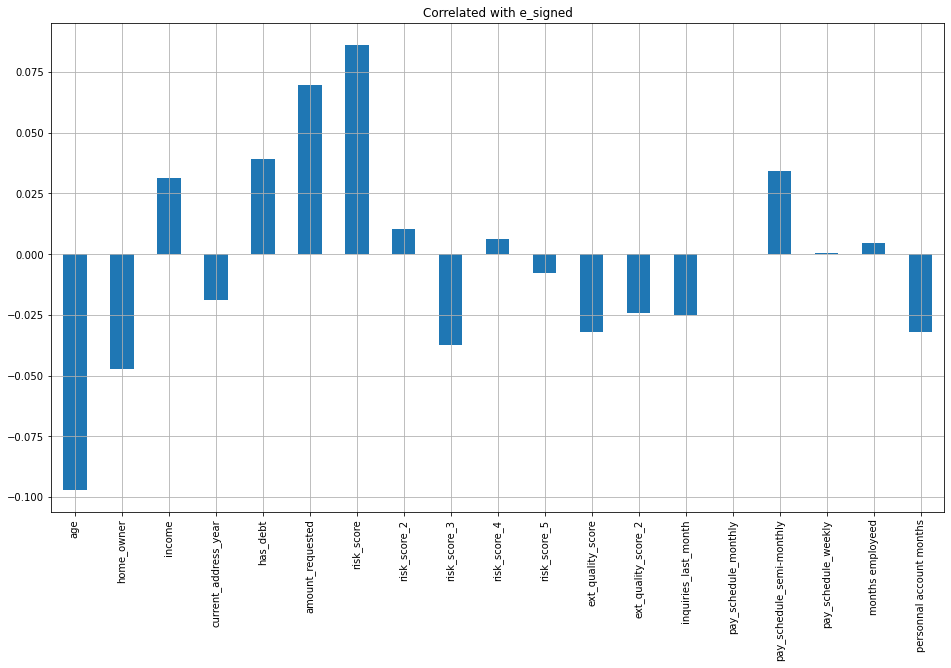

In [45]:
dataset_2.corrwith(dataset['e_signed']).plot.bar(
    figsize=(16, 9), title = 'Correlated with e_signed', grid=True
)

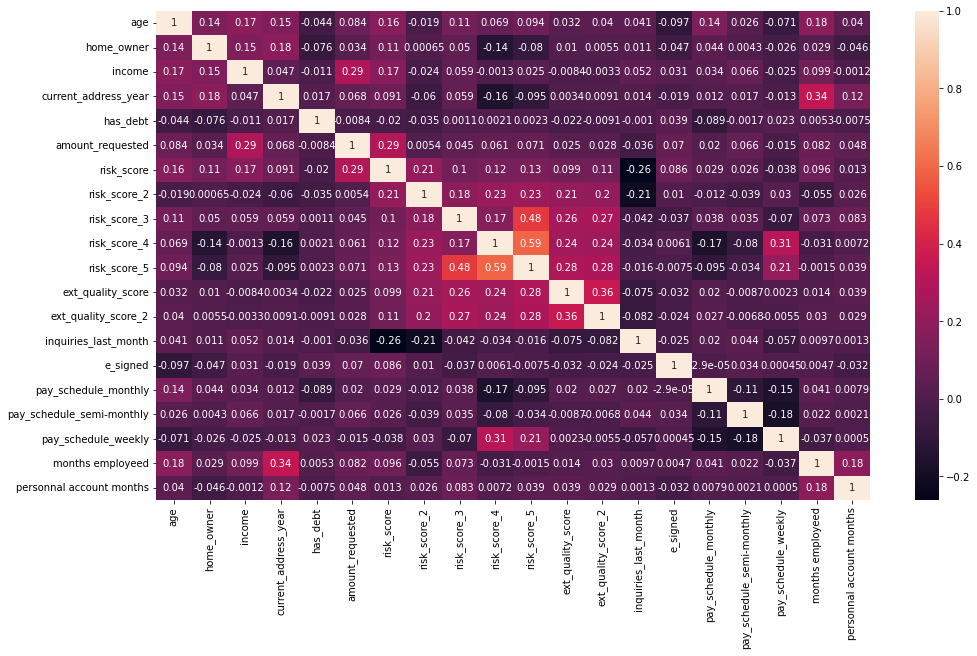

In [46]:
# heatmap
plt.figure(figsize=(16,9))
ax = sns.heatmap(dataset.corr(), annot=True)

## Splitting the dataset

In [48]:
# independent variables / matrix features
X = dataset.drop(columns=['e_signed'])

In [49]:
# target variable
Y = dataset['e_signed']

In [50]:
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [90]:
print(X.shape, X_train.shape, X_test.shape)

(17908, 19) (14326, 19) (3582, 19)


In [91]:
print(Y.shape, Y_train.shape, Y_test.shape)

(17908,) (14326,) (3582,)


## Feature scaling

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
sc = StandardScaler()

In [94]:
X_train = sc.fit_transform(X_train)
X_train

array([[-1.59764088,  1.16208915,  2.27028414, ..., -0.51249159,
         0.65354534,  1.74205397],
       [ 0.51046623, -0.86051918, -0.30848924, ..., -0.51249159,
         0.61624349, -0.79397408],
       [ 1.01641194, -0.86051918, -0.66573337, ..., -0.51249159,
         1.06386573,  1.74205397],
       ...,
       [-0.9230466 , -0.86051918,  0.00244547, ..., -0.51249159,
        -0.68932138, -0.83695761],
       [-1.09169517,  1.16208915,  0.93524959, ...,  1.95125153,
        -1.17424547,  1.7850375 ],
       [-0.9230466 ,  1.16208915, -1.30083405, ..., -0.51249159,
        -0.72662323,  0.1516635 ]])

In [95]:
X_test = sc.fit_transform(X_test)
X_test

array([[-0.44377287,  1.1653885 , -1.35121035, ..., -0.49982551,
        -1.18941294,  0.15278144],
       [-0.86310241, -0.85808295, -1.28689486, ..., -0.49982551,
         0.27744743,  0.32495798],
       [ 0.47875212,  1.1653885 , -0.04459048, ..., -0.49982551,
        -0.28672963, -0.79418952],
       ...,
       [ 1.3174112 , -0.85808295,  0.67303494, ..., -0.49982551,
         0.61595367, -0.70810125],
       [ 0.56261803, -0.85808295,  0.43946817, ..., -0.49982551,
        -1.52791918,  0.23886971],
       [-0.52763878,  1.1653885 , -0.41694329, ...,  2.0006982 ,
        -0.28672963, -0.53592471]])

## Part 2: Building the model¶

## 1) Logistic regression

In [96]:
from sklearn.linear_model import LogisticRegression

In [97]:
classifier_lr = LogisticRegression(random_state=0)

In [98]:
classifier_lr.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [99]:
y_pred = classifier_lr.predict(X_test)

In [100]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [101]:
accuracy_score(Y_test, y_pred)

0.5653266331658291

In [102]:
confusion_matrix(Y_test, y_pred)

array([[ 664,  988],
       [ 569, 1361]], dtype=int64)

## 2) SVM

In [103]:
from sklearn.svm import SVC

In [104]:
classifier_svc = SVC(random_state=0)

In [105]:
classifier_svc.fit(X_train, Y_train)

SVC(random_state=0)

In [106]:
y_pred = classifier_lr.predict(X_test)

In [107]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [108]:
accuracy_score(Y_test, y_pred)

0.5653266331658291

In [109]:
confusion_matrix(Y_test, y_pred)

array([[ 664,  988],
       [ 569, 1361]], dtype=int64)

## 3) Random forest

In [110]:
from sklearn.ensemble import RandomForestClassifier

In [111]:
classifier_rf = RandomForestClassifier(random_state=0)

In [112]:
classifier_rf.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

In [113]:
y_pred = classifier_lr.predict(X_test)

In [114]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [115]:
accuracy_score(Y_test, y_pred)

0.5653266331658291

In [116]:
confusion_matrix(Y_test, y_pred)

array([[ 664,  988],
       [ 569, 1361]], dtype=int64)

## 4) XGBoost Classifier

In [117]:
from xgboost import XGBClassifier

In [118]:
classifier_xgb = XGBClassifier(random_state=0)

In [119]:
classifier_xgb.fit(X_train, Y_train)

[23:58:50] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [120]:
y_pred = classifier_lr.predict(X_test)

In [121]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [122]:
accuracy_score(Y_test, y_pred)

0.5653266331658291

In [123]:
confusion_matrix(Y_test, y_pred)

array([[ 664,  988],
       [ 569, 1361]], dtype=int64)

## Part 3: Applying Randomized Search to find the best parameters

In [148]:
from sklearn.model_selection import RandomizedSearchCV

In [149]:
parameters = {
    'learning_rate':[0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    'max_depth':[3, 4, 5, 6, 8, 10, 12, 15],
    'min_child_weight':[1, 3, 5, 7],
    'gamma':[0.00, 0.1, 0.2, 0.3, 0.4],
    'colsample_bytree':[0.3, 0.4, 0.5, 0.7],
    'n_estimators':[100, 200, 500],
    'subsample':[0.5, 0.7, 1.0]
}

In [150]:
parameters

{'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
 'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
 'min_child_weight': [1, 3, 5, 7],
 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
 'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
 'n_estimators': [100, 200, 500],
 'subsample': [0.5, 0.7, 1.0]}

In [151]:
random_cv = RandomizedSearchCV(estimator=classifier_xgb, param_distributions=parameters, n_iter=5,
                               scoring='roc_auc', n_jobs=-1, cv=5, verbose=3)

In [152]:
random_cv.fit(X_train, Y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[00:10:22] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           enable_categorical=False, gamma=0,
                                           gpu_id=-1, importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimat...
                                           tree_method='exact',
                                           validate_parameters=1,
                                           verbosity=None),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': [100, 200, 500],
                                        'subsample': [0.5, 0.7, 1.0]},
                   scoring='roc_auc', verbose=3)

In [153]:
random_cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, gamma=0.4, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.5, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [154]:
random_cv.best_params_

{'subsample': 0.5,
 'n_estimators': 100,
 'min_child_weight': 5,
 'max_depth': 5,
 'learning_rate': 0.05,
 'gamma': 0.4,
 'colsample_bytree': 0.7}

In [ ]:
random_cv.best_score_

0.6919055222459966

## Part 4: Final model (XGBoost Classifier)

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4,
              enable_categorical=False, gamma=0.3, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=500, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1.0, tree_method='exact', validate_parameters=1,
              verbosity=None)
classifier.fit(X_train, Y_train)

[00:12:16] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4,
              enable_categorical=False, gamma=0.3, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=500, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1.0, tree_method='exact', validate_parameters=1,
              verbosity=None)

## Part 5: Predicting a single observation

In [164]:
dataset.head()

,age,home_owner,income,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,months employeed,personnal account months
0,40,1,3135,3,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,0,0,0,36,30
1,61,0,3180,3,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,0,0,1,72,86
2,23,0,1540,0,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,0,0,1,6,19
3,40,0,5230,1,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,0,0,0,72,86
4,33,0,3590,2,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,0,1,0,60,98


In [165]:
single_obs = [[45, 1, 2500,3,1,600,37000,0.7373, 0.9035, 0.4877, 0.515977, 0.580918, 0.380918, 10, 0, 0, 0, 36, 30]]

In [167]:
classifier_lr.predict(sc.transform(single_obs))

array([0], dtype=int64)